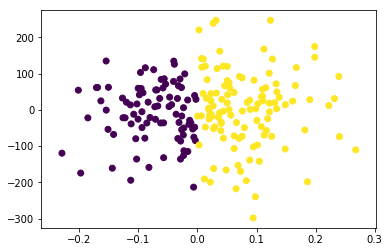

In [1]:
# Import modules
%matplotlib inline
import matplotlib
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate data
# Here the second variable is three magnitude orders larger than the first one
sp.random.seed(10)
X = sp.random.randn(200,2)
X[:,0] *= 0.1
X[:,1] *= 100

# Create a vertical class boundary: depends on the first variable X[:,0]  only
y = sp.ones((200,))
y[X[:,0]<0]=0

# Plot
plt.scatter(X[:,0], X[:,1], c=y)

In [6]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0, stratify=y)
model = SVC(kernel='rbf',gamma='auto')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Classification accuracy before scaling: {}".format(accuracy_score(y_test,y_pred)))

Classification accuracy before scaling: 0.5625


In [7]:
from sklearn.preprocessing import MinMaxScaler
# Scale data
sc = MinMaxScaler()
X_train_s= sc.fit_transform(X_train) # Scale data between 0 and 1
X_test_s= sc.transform(X_test) # Scale data between 0 and 1c

In [9]:
model = SVC(kernel='rbf',gamma='auto')
model.fit(X_train_s,y_train)
y_pred = model.predict(X_test_s)
print("Classification accuracy after scaling: {}".format(accuracy_score(y_test,y_pred)))

Classification accuracy after scaling: 0.9375


In [10]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
sc = StandardScaler()
X_train_s= sc.fit_transform(X_train)
X_test_s= sc.transform(X_test)

model = SVC(kernel='rbf')
model.fit(X_train_s, y_train)
y_pred = model.predict(X_test_s)
print("Classification accuracy after standardization: {}".format(accuracy_score(y_test,y_pred)))

Classification accuracy after standardization: 0.9625
